In [170]:
import os
import cv2
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [171]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 16
})

#### Combine files

In [5]:
def combine_parts(methods=['RHFM', 'ZM', 'PZM'], parts='parts'):
    for method in methods:
        files = list(filter(lambda file: file.startswith(method) and os.path.isfile(parts+'/'+file), os.listdir(parts)))
        files = list(map(lambda file: parts+'/'+file, files))
        combined = pd.concat([pd.read_csv(f) for f in files ])
        combined.to_csv(method+'.csv', index=False)

In [6]:
combine_parts()

#### Prepare

In [7]:
rhfm = pd.read_csv('RHFM.csv')
zm = pd.read_csv('ZM.csv')
pzm = pd.read_csv('PZM.csv')

In [185]:
def extraxt(cols, extraxt_x=lambda name:float(name.split('/')[-1]), defx=1.0,):
    global rhfm, zm, pzm
    xs = []
    ys_rhfm = []
    ys_zm = []
    ys_pzm = []
    for col in cols:
        if col is None:
            xs.append(defx)
            ys_rhfm.append(0)
            ys_zm.append(0)
            ys_pzm.append(0)
            continue
        xs.append(extraxt_x(col))
        ys_rhfm.append(rhfm[col].mean())
        ys_zm.append(zm[col].mean())
        ys_pzm.append(pzm[col].mean())
    return (xs, ys_rhfm, ys_zm, ys_pzm)

In [186]:
def get_lines(ys_rhfm, ys_zm, ys_pzm, scale=lambda x:str(x)):
    lines = []
    for (x,a,b,c) in zip(xs, ys_rhfm, ys_zm, ys_pzm):
        aa = a = round(1-a,4)
        bb = b = round(1-b,4)
        cc = c = round(1-c,4)
        if a <= b and a <= c: aa = '\\textbf{'+str(a)+'}'
        if b <= a and b <= c: b = '\\textbf{'+str(b)+'}'
        if c <= a and c <= b: cc = '\\textbf{'+str(c)+'}'
        lines.append(' '.join(map(str,[aa, '&', bb, '&', cc])))
    return lines

In [187]:
def make_table(groups):
    lines_arr = []
    for (prefix,scale) in groups:
        cols = list(filter(lambda name:name.startswith(prefix),rhfm.columns))
        ex = extraxt(cols)
        lines_arr.append(get_lines(*ex[1:], scale=scale))
    for lines in zip(ex[0], *lines_arr):
        print('  &  '.join([str(scale(lines[0])), *lines[1:]]) + '  \\\\')

In [301]:
def plot_field(plt, ax, field, xlabel, ylabel, ylim, pad=[], padlen=3):
    global xs, ys_rhfm, ys_zm, ys_pzm
    ax.set_title(field)
    ax.plot(xs, 1-np.array(ys_rhfm), 'k:s', label='RHFM')
    ax.plot(xs, 1-np.array(ys_zm), 'k:x', label='ZM')
    ax.plot(xs, 1-np.array(ys_pzm), 'k:o', label='PZM')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(xs)
    for p in pad:
        xs[p] = '-'*padlen + '  ' + str(xs[p])
    ax.set_xticklabels(xs)
    ax.set_ylim(ylim)
    plt.setp(ax.get_xticklabels(), rotation=270)
    ax.legend()

#### Resize

In [265]:
scale = lambda x: '$'+str(x)+'$'
make_table([
    ('Resize/Linear/', scale),
    ('Resize/Bicubic/', scale),
])

$0.2$  &  \textbf{0.28} & 0.4162 & 0.4081  &  \textbf{0.28} & 0.4162 & 0.4081  \\
$0.3$  &  \textbf{0.1088} & 0.2694 & 0.2562  &  \textbf{0.1088} & 0.2694 & 0.2562  \\
$0.4$  &  \textbf{0.0316} & 0.1516 & 0.1153  &  \textbf{0.0316} & 0.1516 & 0.1153  \\
$0.5$  &  \textbf{0.0084} & 0.0728 & 0.0453  &  \textbf{0.0084} & 0.0728 & 0.0453  \\
$0.6$  &  \textbf{0.0059} & 0.0469 & 0.0275  &  \textbf{0.0059} & 0.0469 & 0.0275  \\
$0.7$  &  \textbf{0.0056} & 0.0319 & 0.0169  &  \textbf{0.0056} & 0.0319 & 0.0169  \\
$0.8$  &  \textbf{0.0056} & 0.0172 & 0.0072  &  \textbf{0.0056} & 0.0172 & 0.0072  \\
$0.9$  &  \textbf{0.0056} & 0.0128 & 0.0062  &  \textbf{0.0056} & 0.0128 & 0.0062  \\
$1.1$  &  0.0056 & 0.0128 & \textbf{0.0047}  &  0.0056 & 0.0128 & \textbf{0.0047}  \\
$1.2$  &  0.0056 & 0.0119 & \textbf{0.0047}  &  0.0056 & 0.0119 & \textbf{0.0047}  \\
$1.3$  &  0.0056 & 0.0119 & \textbf{0.0044}  &  0.0056 & 0.0119 & \textbf{0.0044}  \\
$1.4$  &  0.0056 & 0.0119 & \textbf{0.0044}  &  0.0056 & 0

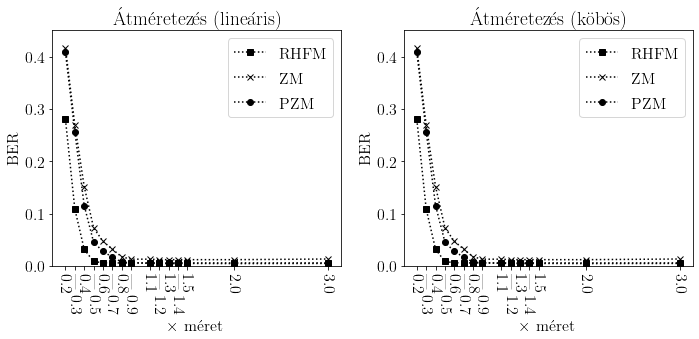

In [373]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

xs, ys_rhfm, ys_zm, ys_pzm = extraxt(list(filter(lambda name:name.startswith('Resize/Linear'),rhfm.columns)))
plot_field(plt, axes[0], 'Átméretezés (lineáris)', '$\\times$ méret', 'BER', (0,0.45), pad=[1,3,5,7,9,11], padlen=3)
xs, ys_rhfm, ys_zm, ys_pzm = extraxt(list(filter(lambda name:name.startswith('Resize/Bicubic'),rhfm.columns)))
plot_field(plt, axes[1], 'Átméretezés (köbös)', '$\\times$ méret', 'BER', (0,0.45), pad=[1,3,5,7,9,11], padlen=3)

plt.tight_layout()
plt.savefig('bs_resize.png', dpi=300)
plt.show()

#### Rotate

In [374]:
scale = lambda x: '$'+str(x)+'$'
make_table([
    ('Rotate/Linear/', scale),
    ('Rotate/Bicubic/', scale),
])

$1.0$  &  0.0056 & 0.0119 & \textbf{0.0044}  &  0.0056 & 0.0119 & \textbf{0.0044}  \\
$2.0$  &  0.0056 & 0.0119 & \textbf{0.0044}  &  0.0059 & 0.0119 & \textbf{0.0044}  \\
$3.0$  &  0.0056 & 0.0119 & \textbf{0.0044}  &  0.0056 & 0.0119 & \textbf{0.0044}  \\
$4.0$  &  0.0056 & 0.0119 & \textbf{0.0044}  &  0.0056 & 0.0119 & \textbf{0.0044}  \\
$5.0$  &  0.0056 & 0.0119 & \textbf{0.0044}  &  0.0059 & 0.0119 & \textbf{0.0044}  \\
$10.0$  &  0.0059 & 0.0119 & \textbf{0.0044}  &  0.0059 & 0.0119 & \textbf{0.0044}  \\
$15.0$  &  0.0062 & 0.0119 & \textbf{0.0053}  &  0.0062 & 0.0119 & \textbf{0.0047}  \\
$20.0$  &  0.0062 & 0.0119 & \textbf{0.0044}  &  0.0059 & 0.0119 & \textbf{0.0044}  \\
$25.0$  &  0.0056 & 0.0119 & \textbf{0.0044}  &  0.0056 & 0.0119 & \textbf{0.0044}  \\
$30.0$  &  0.0056 & 0.0119 & \textbf{0.0044}  &  0.0056 & 0.0119 & \textbf{0.0044}  \\
$35.0$  &  0.0056 & 0.0122 & \textbf{0.005}  &  0.0056 & 0.0128 & \textbf{0.005}  \\
$40.0$  &  0.0056 & 0.0138 & \textbf{0.0044}  &  0

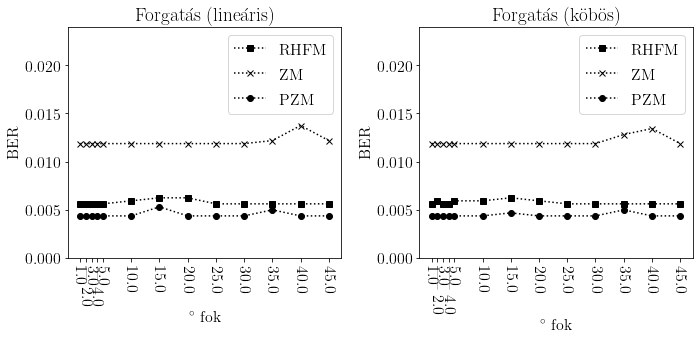

In [375]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

xs, ys_rhfm, ys_zm, ys_pzm = extraxt(list(filter(lambda name:name.startswith('Rotate/Linear'),rhfm.columns)))
plot_field(plt, axes[0], 'Forgatás (lineáris)', '$^{\circ}$ fok', 'BER', (0,0.024), pad=[1,3], padlen=3)
xs, ys_rhfm, ys_zm, ys_pzm = extraxt(list(filter(lambda name:name.startswith('Rotate/Bicubic'),rhfm.columns)))
plot_field(plt, axes[1], 'Forgatás (köbös)', '$^{\circ}$ fok', 'BER', (0,0.024), pad=[1,3], padlen=5)

plt.tight_layout()
plt.savefig('bs_rotate.png', dpi=300)
plt.show()

#### Blur

In [376]:
scale = lambda x: '$'+str(x)+'$'
make_table([
    ('Blur/3x3/', scale),
    ('Blur/5x5/', scale),
    ('Blur/5x5/', scale),
])

$1.0$  &  0.0056 & 0.0119 & \textbf{0.0044}  &  0.0056 & 0.0119 & \textbf{0.0044}  &  0.0056 & 0.0119 & \textbf{0.0044}  \\
$1.25$  &  0.0056 & 0.0119 & \textbf{0.0044}  &  0.0056 & 0.0119 & \textbf{0.0044}  &  0.0056 & 0.0119 & \textbf{0.0044}  \\
$1.5$  &  0.0056 & 0.0119 & \textbf{0.0044}  &  0.0056 & 0.0119 & \textbf{0.0044}  &  0.0056 & 0.0119 & \textbf{0.0044}  \\
$1.75$  &  0.0056 & 0.0119 & \textbf{0.0044}  &  0.0056 & 0.0119 & \textbf{0.0044}  &  0.0056 & 0.0119 & \textbf{0.0044}  \\
$2.0$  &  0.0056 & 0.0119 & \textbf{0.0044}  &  0.0056 & 0.0119 & \textbf{0.0044}  &  0.0056 & 0.0119 & \textbf{0.0044}  \\
$2.25$  &  0.0056 & 0.0119 & \textbf{0.0044}  &  0.0056 & 0.0119 & \textbf{0.0044}  &  0.0056 & 0.0119 & \textbf{0.0044}  \\
$2.5$  &  0.0056 & 0.0119 & \textbf{0.0044}  &  0.0056 & 0.0119 & \textbf{0.0044}  &  0.0056 & 0.0119 & \textbf{0.0044}  \\
$2.75$  &  0.0056 & 0.0119 & \textbf{0.0044}  &  0.0056 & 0.0119 & \textbf{0.0044}  &  0.0056 & 0.0119 & \textbf{0.0044}  \\
$3.0

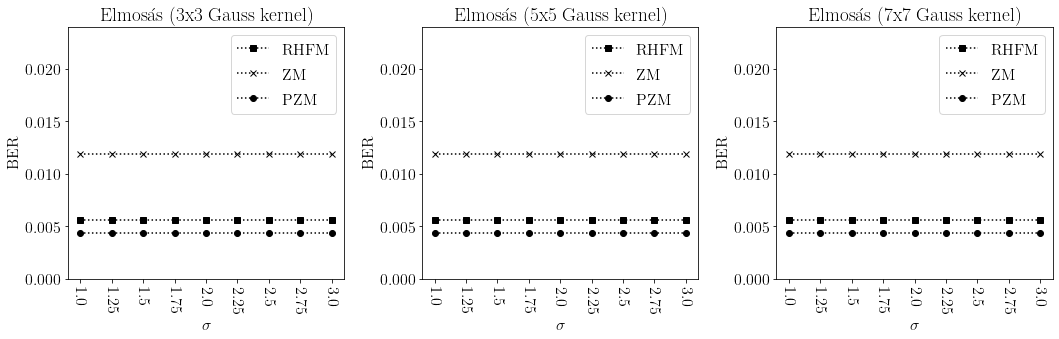

In [377]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

xs, ys_rhfm, ys_zm, ys_pzm = extraxt(list(filter(lambda name:name.startswith('Blur/3x3'),rhfm.columns)))
plot_field(plt, axes[0], 'Elmosás (3x3 Gauss kernel)', '$\sigma$', 'BER', (0,0.024))
xs, ys_rhfm, ys_zm, ys_pzm = extraxt(list(filter(lambda name:name.startswith('Blur/5x5'),rhfm.columns)))
plot_field(plt, axes[1], 'Elmosás (5x5 Gauss kernel)', '$\sigma$', 'BER', (0,0.024))
xs, ys_rhfm, ys_zm, ys_pzm = extraxt(list(filter(lambda name:name.startswith('Blur/7x7'),rhfm.columns)))
plot_field(plt, axes[2], 'Elmosás (7x7 Gauss kernel)', '$\sigma$', 'BER', (0,0.024))

plt.tight_layout()
plt.savefig('bs_blur.png', dpi=300)
plt.show()

#### Sharpen

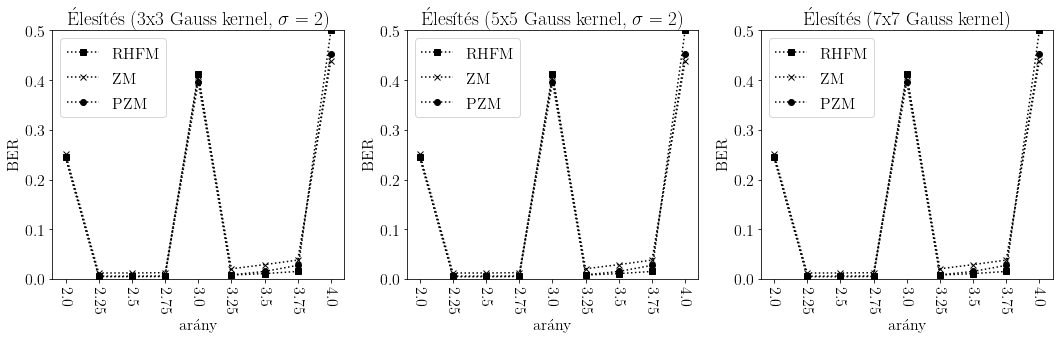

In [383]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

xs, ys_rhfm, ys_zm, ys_pzm = extraxt(list(filter(lambda name:name.startswith('Sharpen/3x3'),rhfm.columns)))
plot_field(plt, axes[0], 'Élesítés (3x3 Gauss kernel, $\sigma=2$)', 'arány', 'BER', (0,0.5))
xs, ys_rhfm, ys_zm, ys_pzm = extraxt(list(filter(lambda name:name.startswith('Sharpen/5x5'),rhfm.columns)))
plot_field(plt, axes[1], 'Élesítés (5x5 Gauss kernel, $\sigma=2$)', 'arány', 'BER', (0,0.5))
xs, ys_rhfm, ys_zm, ys_pzm = extraxt(list(filter(lambda name:name.startswith('Sharpen/7x7'),rhfm.columns)))
plot_field(plt, axes[2], 'Élesítés (7x7 Gauss kernel)', 'arány', 'BER', (0,0.5))

plt.tight_layout()
plt.savefig('bs_sharpening.png', dpi=300)
plt.show()

#### Median

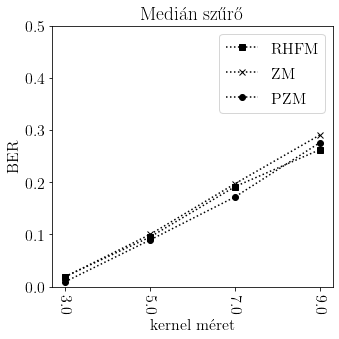

In [379]:
fig, axes = plt.subplots(1,1, figsize=(5,5))

xs, ys_rhfm, ys_zm, ys_pzm = extraxt(list(filter(lambda name:name.startswith('Median'),rhfm.columns)))
plot_field(plt, axes, 'Medián szűrő', 'kernel méret', 'BER', (0,0.5))

plt.tight_layout()
plt.savefig('bs_median.png', dpi=300)
plt.show()

#### Contrast & Brightness

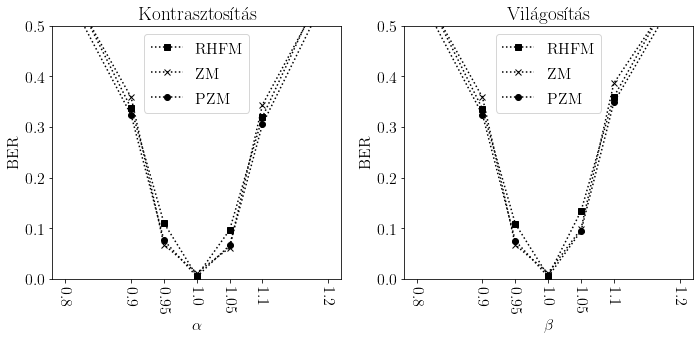

In [380]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

xs, ys_rhfm, ys_zm, ys_pzm = extraxt(list(filter(lambda name:name.startswith('Contrast'),rhfm.columns)))
plot_field(plt, axes[0], 'Kontrasztosítás', '$\\alpha$', 'BER', (0,0.5))
xs, ys_rhfm, ys_zm, ys_pzm = extraxt(list(filter(lambda name:name.startswith('Brightness'),rhfm.columns)))
plot_field(plt, axes[1], 'Világosítás', '$\\beta$', 'BER', (0,0.5))

plt.tight_layout()
plt.savefig('bs_enhance.png', dpi=300)
plt.show()

#### SaltPepper & WhiteNoise

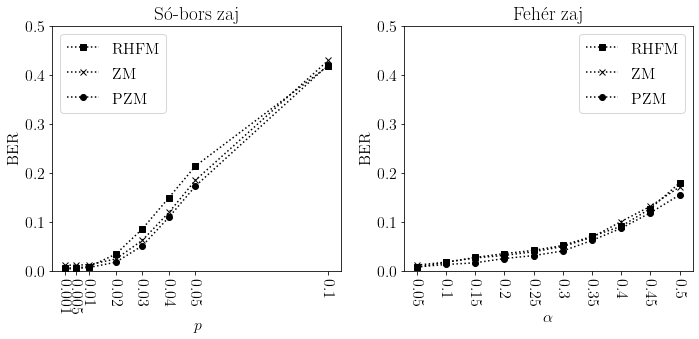

In [381]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

xs, ys_rhfm, ys_zm, ys_pzm = extraxt(list(filter(lambda name:name.startswith('SaltPepper'),rhfm.columns)))
plot_field(plt, axes[0], 'Só-bors zaj', '$p$', 'BER', (0,0.5))
xs, ys_rhfm, ys_zm, ys_pzm = extraxt(list(filter(lambda name:name.startswith('WhiteNoise'),rhfm.columns)))
plot_field(plt, axes[1], 'Fehér zaj', '$\\alpha$', 'BER', (0,0.5))

plt.tight_layout()
plt.savefig('bs_noises.png', dpi=300)
plt.show()

#### JPEG & WebP

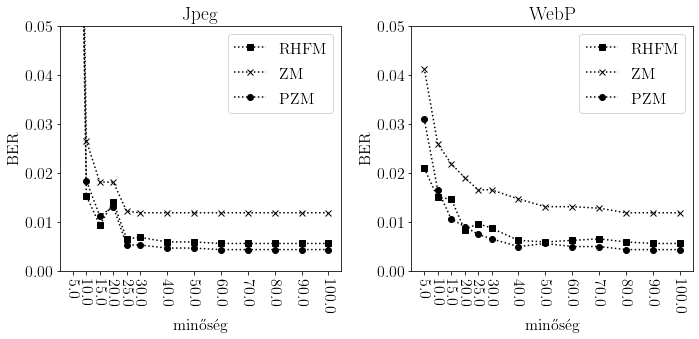

In [382]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

xs, ys_rhfm, ys_zm, ys_pzm = extraxt(list(filter(lambda name:name.startswith('JPEG/'),rhfm.columns)))
plot_field(plt, axes[0], 'Jpeg', 'minőség', 'BER', (0,0.050))
xs, ys_rhfm, ys_zm, ys_pzm = extraxt(list(filter(lambda name:name.startswith('WebP/'),rhfm.columns)))
plot_field(plt, axes[1], 'WebP', 'minőség', 'BER', (0,0.050))

plt.tight_layout()
plt.savefig('bs_compression.png', dpi=300)
plt.show()

In [114]:
list(rhfm.columns)

['im',
 'L',
 'k',
 'qs',
 'Resize/Linear/0.2',
 'Resize/Linear/0.3',
 'Resize/Linear/0.4',
 'Resize/Linear/0.5',
 'Resize/Linear/0.6',
 'Resize/Linear/0.7',
 'Resize/Linear/0.8',
 'Resize/Linear/0.9',
 'Resize/Linear/1.1',
 'Resize/Linear/1.2',
 'Resize/Linear/1.3',
 'Resize/Linear/1.4',
 'Resize/Linear/1.5',
 'Resize/Linear/2',
 'Resize/Linear/3',
 'Resize/Bicubic/0.2',
 'Resize/Bicubic/0.3',
 'Resize/Bicubic/0.4',
 'Resize/Bicubic/0.5',
 'Resize/Bicubic/0.6',
 'Resize/Bicubic/0.7',
 'Resize/Bicubic/0.8',
 'Resize/Bicubic/0.9',
 'Resize/Bicubic/1.1',
 'Resize/Bicubic/1.2',
 'Resize/Bicubic/1.3',
 'Resize/Bicubic/1.4',
 'Resize/Bicubic/1.5',
 'Resize/Bicubic/2',
 'Resize/Bicubic/3',
 'Rotate/Linear/1',
 'Rotate/Linear/2',
 'Rotate/Linear/3',
 'Rotate/Linear/4',
 'Rotate/Linear/5',
 'Rotate/Linear/10',
 'Rotate/Linear/15',
 'Rotate/Linear/20',
 'Rotate/Linear/25',
 'Rotate/Linear/30',
 'Rotate/Linear/35',
 'Rotate/Linear/40',
 'Rotate/Linear/45',
 'Rotate/Bicubic/1',
 'Rotate/Bicubic/2